In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import wcs
from astroquery.svo_fps import SvoFps
import numpy as np
import reproject
from astropy.visualization import simple_norm
import os.path

basepath = '/orange/adamginsburg/jwst/w51/filter_subtractions'
if not os.path.isdir(basepath):
    os.system('mkdir '+basepath)

In [ ]:
"""
downloads = '/orange/adamginsburg/jwst/w51/mastDownload/JWST/'

image_filenames_pipe ={
    "f140m":downloads+"jw06151-o001_t003_nircam_clear-f140m/jw06151-o001_t003_nircam_clear-f140m_i2d.fits",
    "f150w": downloads+"jw06151-o001_t003_nircam_f150w2-f162m/jw06151-o001_t003_nircam_clear-f150w2-f162m_i2d.fits",
    "f182m": downloads+"jw06151-o001_t003_nircam_clear-f182m/jw06151-o001_t003_nircam_clear-f182m_i2d.fits",
    "f187n": downloads+"jw06151-o001_t003_nircam_clear-f187n/jw06151-o001_t003_nircam_clear-f187n_i2d.fits",
    "f210m": downloads+"jw06151-o001_t003_nircam_clear-f210m/jw06151-o001_t003_nircam_clear-f210m_i2d.fits",
    "f212n": downloads+"jw06151-o001_t003_nircam_clear-f335m/jw06151-o001_t003_nircam_clear-f335m_i2d.fits",
    "f335m": downloads+"jw06151-o001_t003_nircam_clear-f335m/jw06151-o001_t003_nircam_clear-f335m_i2d.fits",
    "f360m": downloads+"jw06151-o001_t003_nircam_clear-f360m/jw06151-o001_t003_nircam_clear-f360m_i2d.fits",
    "f405n": downloads+"jw06151-o001_t003_nircam_f405n-f444w/jw06151-o001_t003_nircam_f405n-f444w_i2d.fits",
    "f410m": downloads+"jw06151-o001_t003_nircam_clear-f410m/jw06151-o001_t003_nircam_clear-f410m_i2d.fits",
    "f480m": downloads+"jw06151-o001_t003_nircam_clear-f480m/jw06151-o001_t003_nircam_clear-f480m_i2d.fits",
}

downloads = '/orange/adamginsburg/jwst/w51/'
image_filenames_pipe ={
    "f140m":downloads+"F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged-reproject_i2d.fits",
    "f150w": downloads+"F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged-reproject_i2d.fits",
    "f182m": downloads+"F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged-reproject_i2d.fits",
    "f187n": downloads+"F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged-reproject_i2d.fits",
    "f210m": downloads+"F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged-reproject_i2d.fits",
    "f335m": downloads+"F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged-reproject_i2d.fits",
    "f360m": downloads+"F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged-reproject_i2d.fits",
    "f405n": downloads+"F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged-reproject_i2d.fits",
    "f410m": downloads+"F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged-reproject_i2d.fits",
    "f480m": downloads+"F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged-reproject_i2d.fits",

}
"""
#basepath = '/orange/adamginsburg/jwst/w51/mastDownload/JWST/'
basepath = '/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/'
image_filenames_pipe ={
    "f140m":basepath+"F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": basepath+"F150M/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f182m": basepath+"F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": basepath+"F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": basepath+"F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": basepath+"F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": basepath+"F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": basepath+"F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": basepath+"F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits",
    "f480m": basepath+"F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
}

In [3]:
# reproject to the longer wavelength filter
# if the filters have no overlap, use BB to scale the fluxes. Produce both scaled and unscaled version
# if there is an overlap, follow the formula and produce both images

In [4]:
def do_reproject(data_short, header_long):
    data_short_reprojected_long = reproject.reproject_exact(data_short, header_long)
    return data_short_reprojected_long

In [5]:
wavelength_table_wide = SvoFps.get_transmission_data('JWST/NIRCAM.f480m')
trans_wide = wavelength_table_wide['Transmission']
max(trans_wide)

np.float64(0.39956)

In [6]:
wavelength_table_wide = SvoFps.get_transmission_data('JWST/NIRCAM.f466n')
trans_wide = wavelength_table_wide['Transmission']
max(trans_wide)

np.float64(0.329675)

In [7]:
def subtract_filters(input1, input2):
    
    if input1[1:4] > input2[1:4]:
        long = input1
        short = input2
    else:
        long = input2
        short = input1

    fh_short = fits.open(image_filenames_pipe[short])
    fh_long = fits.open(image_filenames_pipe[long])

    # start by reprojecting to the longer wavelength
    print(f'Reprojecting the short wavelength filter ({short}) to the long wavelength filter ({long})')
    data_short_reprojected_long = do_reproject(fh_short['SCI'], fh_long['SCI'].header)[0] # moved the [0] here
    header_reprojected = fh_long['SCI'].header





    


    # determine which filter is narrow and which is wide:

    # both are the same
    if input1[4:] == input2[4:]:
        # scale the fluxes using BB
        wav_short = short[1:4]
        wav_long = long[1:4]
        scale_factor_short = (int(wav_short)/int(wav_long))**2
        data_long = fh_long['SCI'].data
        data_short = data_short_reprojected_long
        data_short_scaled = data_short_reprojected_long * scale_factor_short

        fits.PrimaryHDU(data=(data_long-data_short_scaled), header=header_reprojected).writeto(f'{basepath}/{long}_minus_{short}_scaled_BB.fits', overwrite=True)
        fits.PrimaryHDU(data=(data_long-data_short), header=header_reprojected).writeto(f'{basepath}/{long}_minus_{short}_unscaled.fits', overwrite=True)



        return
    elif (input1[4:] == 'w') | (input2[4:] == 'w'): # replace "or" with a vertical slash
        print('not yet supported')
        return
    elif input1[4:] == 'n':
        narrow = input1
        wide = input2
    elif input2[4:] == 'n':
        narrow = input2
        wide = input1
    else:
        print('There should be no need for this, but leaving for testing')

    if wide == long:
        data_wide = fh_long['SCI'].data
        data_narrow = data_short_reprojected_long
    elif wide == short:
        data_wide = data_short_reprojected_long
        data_narrow = fh_long['SCI'].data
    



    fh_narrow = fits.open(image_filenames_pipe[narrow])
    fh_wide = fits.open(image_filenames_pipe[wide])

    wavelength_table_narrow = SvoFps.get_transmission_data(f'JWST/NIRCAM.{narrow}')
    wavelength_table_wide = SvoFps.get_transmission_data(f'JWST/NIRCAM.{wide}')

    waves_wide = wavelength_table_wide['Wavelength']
    trans_narrow = np.interp(waves_wide, wavelength_table_narrow['Wavelength'], wavelength_table_narrow['Transmission'])
    trans_wide = wavelength_table_wide['Transmission']


    fractional_bandwidth = ( (trans_wide/trans_wide.max()) * (trans_narrow/trans_narrow.max()) ).sum() / (trans_wide/trans_wide.max()).sum()
    print(f'Fractional bandwidth: {fractional_bandwidth}')
    if fractional_bandwidth == 1:
        print("The filters either have no overlap or are identical. Exiting")
        return


    wide_minus_narrow = (data_wide - data_narrow * fractional_bandwidth) / (1-fractional_bandwidth)
    #return wide_minus_narrow
    print(f"Saving the wide_minus_narrow image as {wide}_minus_{narrow}.fits (continuum without line)") 
    fits.PrimaryHDU(data=wide_minus_narrow, header=header_reprojected).writeto(f'{basepath}/{wide}_minus_{narrow}.fits', overwrite=True)

    narrow_minus_wide = data_narrow - wide_minus_narrow
    print(f"Saving the narrow_minus_wide image as {narrow}_minus_{wide}.fits (line)")
    #return narrow_minus_wide
    fits.PrimaryHDU(data=narrow_minus_wide, header=header_reprojected).writeto(f'{basepath}/{narrow}_minus_{wide}.fits', overwrite=True)


In [8]:
#subtract_filters('f212n', 'f210m')

In [9]:
subtract_filters('f182m', 'f187n')

Reprojecting the short wavelength filter (f182m) to the long wavelength filter (f187n)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T13:24:26.762' from MJD-AVG.
Set DATE-END to '2025-05-06T13:48:04.085' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.202551 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610191901.140 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Fractional bandwidth: 0.09655212419159323
Saving the wide_minus_narrow image as f182m_minus_f187n.fits (continuum without line)
Saving the narrow_minus_wide image as f187n_minus_f182m.fits (line)


In [10]:
subtract_filters('f405n', 'f360m')

Reprojecting the short wavelength filter (f360m) to the long wavelength filter (f405n)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T13:24:26.757' from MJD-AVG.
Set DATE-END to '2025-05-06T13:48:04.021' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.202550 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610191894.941 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Fractional bandwidth: 0.2707777891526461
Saving the wide_minus_narrow image as f360m_minus_f405n.fits (continuum without line)
Saving the narrow_minus_wide image as f405n_minus_f360m.fits (line)


In [11]:
subtract_filters('f182m', 'f210m')
subtract_filters('f182m', 'f360m')
subtract_filters('f210m', 'f410m')
subtract_filters('f182m', 'f480m')
subtract_filters('f210m', 'f480m')
subtract_filters('f182m', 'f410m')

Reprojecting the short wavelength filter (f182m) to the long wavelength filter (f210m)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:06:02.819' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Reprojecting the short wavelength filter (f182m) to the long wavelength filter (f360m)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Reprojecting the short wavelength filter (f210m) to the long wavelength filter (f410m)


Set DATE-AVG to '2025-05-06T16:06:02.819' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:06:02.828' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Reprojecting the short wavelength filter (f182m) to the long wavelength filter (f480m)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Reprojecting the short wavelength filter (f210m) to the long wavelength filter (f480m)


Set DATE-AVG to '2025-05-06T16:06:02.819' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Reprojecting the short wavelength filter (f182m) to the long wavelength filter (f410m)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:06:02.828' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


In [12]:
subtract_filters

<function __main__.subtract_filters(input1, input2)>

In [13]:
subtract_filters('f480m', 'f360m')

Reprojecting the short wavelength filter (f360m) to the long wavelength filter (f480m)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:59:22.421' from MJD-AVG.
Set DATE-END to '2025-05-06T17:21:22.408' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [14]:
##subtract_filters('f466n', 'f480m')

In [15]:
subtract_filters('f405n', 'f410m')

Reprojecting the short wavelength filter (f405n) to the long wavelength filter (f410m)


Set DATE-AVG to '2025-05-06T13:24:26.757' from MJD-AVG.
Set DATE-END to '2025-05-06T13:48:04.021' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.202550 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610191894.941 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:06:02.828' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Fractional bandwidth: 0.1027882360899125
Saving the wide_minus_narrow image as f410m_minus_f405n.fits (continuum without line)
Saving the narrow_minus_wide image as f405n_minus_f410m.fits (line)


In [16]:
subtract_filters('f182m', 'f187n')

Reprojecting the short wavelength filter (f182m) to the long wavelength filter (f187n)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T13:24:26.762' from MJD-AVG.
Set DATE-END to '2025-05-06T13:48:04.085' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.202551 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610191901.140 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Fractional bandwidth: 0.09655212419159323
Saving the wide_minus_narrow image as f182m_minus_f187n.fits (continuum without line)
Saving the narrow_minus_wide image as f187n_minus_f182m.fits (line)


In [17]:
plt.imshow(test_narrow_minus_wide, vmin = 0, vmax = 100)

NameError: name 'test_narrow_minus_wide' is not defined

In [ ]:
subtract_filters('f182m', 'f187n')

Reprojecting the short wavelength filter (f182m) to the long wavelength filter (f187n)


Set DATE-AVG to '2025-05-06T15:11:59.611' from MJD-AVG.
Set DATE-END to '2025-05-06T15:35:36.878' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.237189 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610816321.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T13:24:26.762' from MJD-AVG.
Set DATE-END to '2025-05-06T13:48:04.085' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.202551 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610191901.140 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Fractional bandwidth: 0.09655212419159323
Saving the wide_minus_narrow image as f182m_minus_f187n.fits (continuum without line)
Saving the narrow_minus_wide image as f187n_minus_f182m.fits (line)


In [ ]:
#subtract_filters('f212n', 'f210m')

Reprojecting the short wavelength filter (f210m) to the long wavelength filter (f212n)


Set DATE-AVG to '2025-05-06T16:06:02.819' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T14:19:01.510' from MJD-AVG.
Set DATE-END to '2025-05-06T14:41:02.130' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.220310 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610512065.053 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Fractional bandwidth: 0.12872677256361836
Saving the wide_minus_narrow image as f210m_minus_f212n.fits (continuum without line)
Saving the narrow_minus_wide image as f212n_minus_f210m.fits (line)


In [ ]:
bra_path = '/orange/adamginsburg/jwst/w51/filter_subtractions/f405n_minus_f410m.fits'
paa_path = '/orange/adamginsburg/jwst/w51/filter_subtractions/f187n_minus_f182m.fits'
fh_bra = fits.open(bra_path)
fh_paa = fits.open(paa_path)

paa_reprojected_bra = do_reproject(fh_paa['SCI'], fh_bra['SCI'].header)[0]


Set DATE-AVG to '2025-05-06T13:24:26.762' from MJD-AVG.
Set DATE-END to '2025-05-06T13:48:04.085' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.202551 from OBSGEO-[XYZ].
Set OBSGEO-H to 1610191901.140 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2025-05-06T16:06:02.828' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/home/t.yoo/anaconda3/envs/py311/lib/python3.11/site-packages/reproject/common.py:170: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  return reproject_func(


Set DATE-AVG to '2025-05-06T16:06:02.828' from MJD-AVG.
Set DATE-END to '2025-05-06T16:29:39.435' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -25.254571 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611129611.449 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


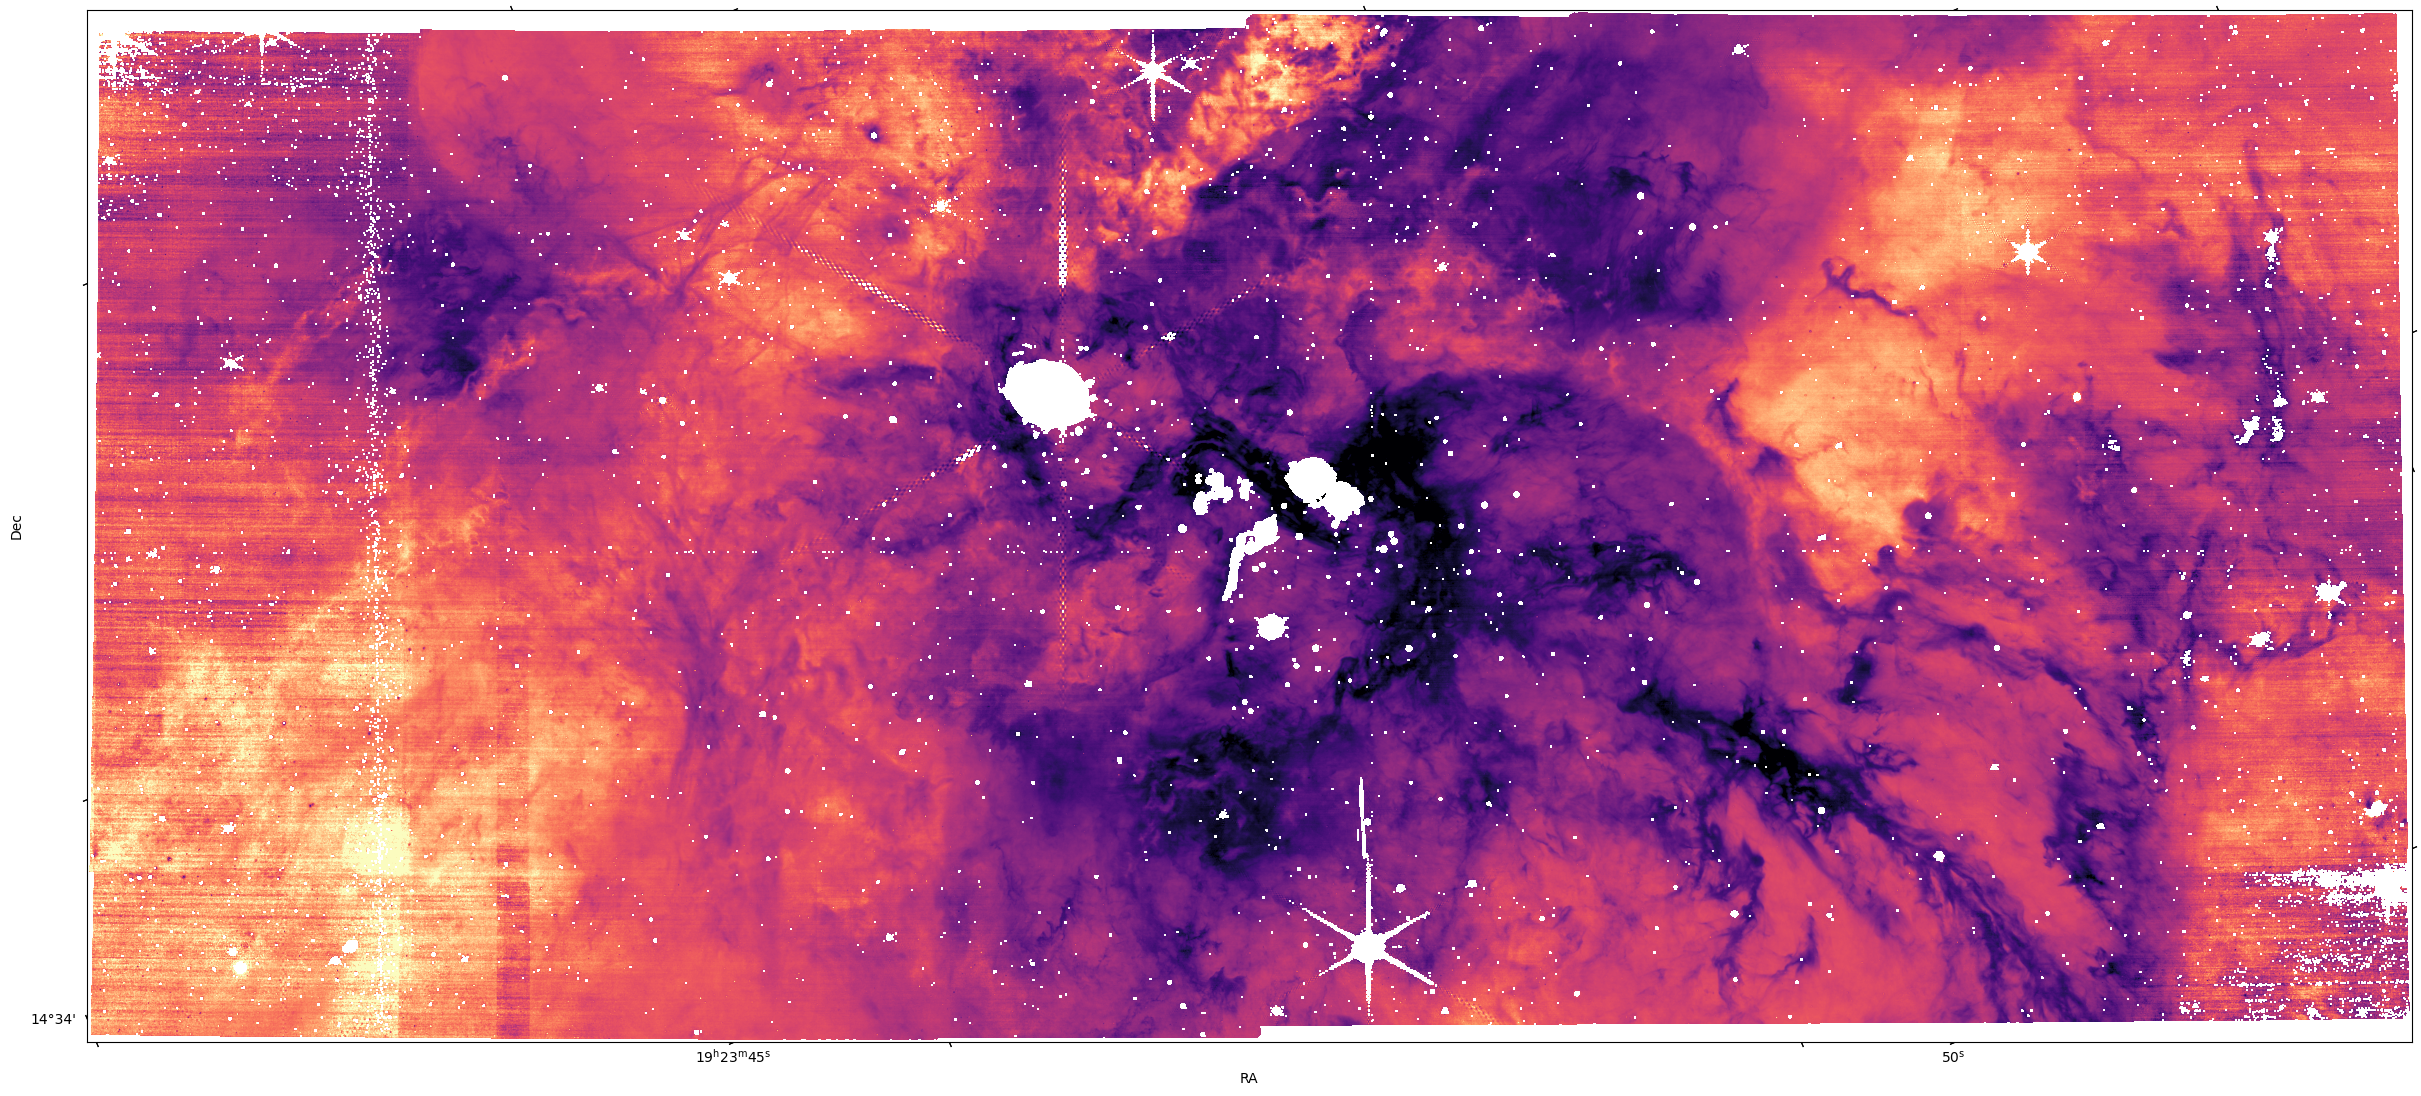

In [ ]:
bra_data = fh_bra['SCI'].data
bra_data[bra_data < 0] = np.nan
paa_reprojected_bra[paa_reprojected_bra < 0] = np.nan
paa_bra_ratio_non_neg = paa_reprojected_bra / bra_data
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection=wcs.WCS(fh_bra['SCI'].header))
norm = simple_norm(paa_bra_ratio_non_neg, 'sqrt', percent=99)
ax.imshow(paa_bra_ratio_non_neg, norm=norm, origin='lower', cmap='magma')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

In [ ]:
fits.PrimaryHDU(data=paa_bra_ratio_non_neg, header=fh_bra['SCI'].header).writeto(f'{basepath}/Paa_Bra_ratio_non_neg.fits', overwrite=True)